In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import requests

# URLs for the weights and classes files
weights_url = "https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights"
classes_url = "https://github.com/arunponnusamy/object-detection-opencv/raw/master/yolov3.txt"

# Function to download a file
def download_file(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded: {filename}")
    else:
        print(f"Failed to download: {url}")

# Download the files
download_file(weights_url, "yolov4.weights")
download_file(classes_url, "yolov3_classes.txt")

Downloaded: yolov4.weights
Downloaded: yolov3_classes.txt


In [3]:
def f_keepLargeComponents(I,th):
    R = np.zeros(I.shape)<0
    unique_labels = np.unique(I.flatten())
    for label in unique_labels:
        if label == 0:
            pass
        else:
            I2 = I==label
            if np.sum(I2)>th:
                R = R | I2
    return np.float32(255*R)

In [4]:
import cvlib as cv
from cvlib.object_detection import draw_bbox
def f_saveSeq(C,counter,th,outPutPath):
    if len(C)<th:
        pass
    else:
        k = 1
        for frame in C:
            imName = str(counter)+'_'+ str(k)+'.jpg'
            finalPath = os.path.join(outPutPath,imName)
            bbox,labels,conf = cv.detect_common_objects(frame)
            frame = draw_bbox(frame,bbox,labels,conf)
            cv2.imwrite(finalPath,frame)
            k += 1

In [5]:
def f_displaySeq(outPutPath):
    for imName in os.listdir(outPutPath):
        frame = cv2.imread(os.path.join(outPutPath,imName))
        frame = cv2.resize(frame,dsize=(600,400))
        cv2.imshow('Display',frame)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
    cv2.destroyAllWindows()

In [8]:
# pth = r'C:\Users\abdulsamad\OneDrive\Desktop\machine test\Data\smart'
# f_displaySeq(pth)

In [9]:
!pip install --upgrade opencv-python opencv-python-headless cvlib


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.7 MB/s eta 0:00:24
   ---------------------------------------- 0.1/38.8 MB 1.5 MB/s eta 0:00:27
   ---------------------------------------- 0.2/38.8 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.3/38.8 MB 2.2 MB/s eta 0:00:18
   ---------------------------------------- 0.5/38.8 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 0.6/38.8 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.7/38.8 MB 2.5 MB/s eta 0:00:16
    --------------------------------------- 1.0/38.8 MB 2.7 MB/s eta 0:00:15
   - -------------------------------------- 1.1/38.8 MB 2.7 MB/s eta 0:00:15
   - -------------------------------------- 1.3/38.8 MB 2.9 MB/s eta 0:00:14
   - -------------------------------------- 1.6/38.8 MB 3.1 MB/s eta 0:00:13
   - -------------------------------------- 1.8/38.8 MB 3.3 MB/s eta 0:00:12
   -- 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\abdulsamad\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [11]:
# import cv2
# import numpy as np
# import os

# # Specify the path to the directory containing images
# #imPath = r'C:\Users\DeLL\Desktop\ML\CV\Data\GroundtruthSeq\RawImages'
# imPath = r'C:\Users\abdulsamad\OneDrive\Desktop\machine test\Data\Campus'
# #imPath = r'C:\Users\DeLL\Desktop\ML\CV\Data\ShoppingMall_resized'

# # Create background subtractor model
# fgModel = cv2.createBackgroundSubtractorMOG2()

# # Minimum number of frames required for processing
# leastNumOfFrames = 5

# # Initialize lists for storing frame indices and frames
# idx = []
# C = []

# # Initialize a counter for frame numbering
# counter = 0

# # Specify the path to the output directory
# outPutPath = r'C:\Users\abdulsamad\OneDrive\Desktop\machine test\Data\smart2_objects'

# # Ensure the output directory exists
# os.makedirs(outPutPath, exist_ok=True)

# # Function to keep only large connected components
# def f_keepLargeComponents(labels, min_size):
#     num_labels, labels_im = cv2.connectedComponents(labels)
#     output = np.zeros(labels.shape, np.uint8)
#     for i in range(1, num_labels):
#         if np.sum(labels_im == i) > min_size:
#             output[labels_im == i] = 255
#     return output

# # Function to save a sequence of frames
# def f_saveSeq(frames, counter, least_num_of_frames, output_path):
#     if len(frames) >= least_num_of_frames:
#         seq_path = os.path.join(output_path, f'sequence_{counter}.avi')
#         fourcc = cv2.VideoWriter_fourcc(*'XVID')
#         out = cv2.VideoWriter(seq_path, fourcc, 20.0, (frames[0].shape[1], frames[0].shape[0]))
#         for frame in frames:
#             out.write(frame)
#         out.release()

# # Process each image in the specified directory
# for imName in os.listdir(imPath):
#     counter += 1
#     frame = cv2.imread(os.path.join(imPath, imName))
#     frame = cv2.resize(frame, dsize=(600, 400))
    
#     # Apply background subtraction
#     fgmask = fgModel.apply(frame)
    
#     # Create a structuring element for morphological operations
#     K_r = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    
#     # Apply morphological opening to the foreground mask
#     fgmask = cv2.morphologyEx(np.float32(fgmask), cv2.MORPH_OPEN, K_r)
    
#     # Find connected components in the foreground mask
#     num_labels, labels_im = cv2.connectedComponents(np.array(fgmask > 0, np.uint8))
    
#     # Keep only large connected components
#     fgmask = f_keepLargeComponents(labels_im, 1000)
    
#     # If there is significant foreground
#     if np.sum(fgmask) > 0:
#         idx.append(counter)
#         C.append(frame)
    
#     # If there are at least two frames and the current frame index indicates a gap
#     if len(idx) >= 2 and idx[-1] > idx[-2] + 1:
#         # Save the sequence of frames
#         f_saveSeq(C, counter, leastNumOfFrames, outPutPath)
#         idx = []
#         C = []

#     # Create an output image with the original frame and foreground mask side by side
#     F = np.zeros(frame.shape, np.uint8)
#     F[:, :, 0], F[:, :, 1], F[:, :, 2] = fgmask, fgmask, fgmask
#     F2 = np.hstack((frame, F))
    
#     # Display the result
#     cv2.imshow('Display', F2)
    
#     # Check for the 'Esc' key press to exit
#     k = cv2.waitKey(5) & 0xff
#     if k == 27:
#         break

# # Save the last sequence of frames
# f_saveSeq(C, counter, leastNumOfFrames, outPutPath)

# # Close all OpenCV windows
# cv2.destroyAllWindows()


: 

In [1]:
vidPath = r'C:\Users\abdulsamad\OneDrive\Desktop\machine test\Data\sroom4.avi'
cap = cv2.VideoCapture(vidPath)
while(1):
    ret, frame = cap.read()
    frame = cv2.resize(frame,dsize=(600,400))
    cv2.imshow('Display',frame)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [12]:
B = cv2.imread(r'Data\GroundtruthSeq\B.bmp')
I = cv2.imread(r'Data\GroundtruthSeq\I.bmp')

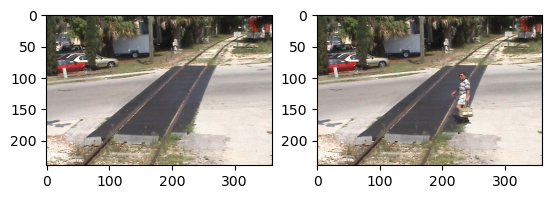

In [13]:
plt.subplot(121)
plt.imshow(B[:,:,::-1])
plt.subplot(122)
plt.imshow(I[:,:,::-1])

In [14]:
B.dtype

dtype('uint8')

In [15]:
B = np.float32(B)
I = np.float32(I)

In [16]:
C = (I-B)**2

In [17]:
C.shape

(240, 360, 3)

In [18]:
C2 = np.sum(C,axis=2)

In [19]:
C2.shape

(240, 360)

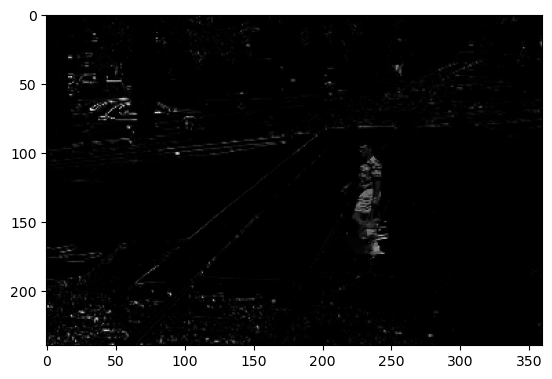

In [20]:
plt.imshow(C2,cmap='gray')

In [21]:
C2.max(),C2.mean()

(189017.0, 2068.9297)

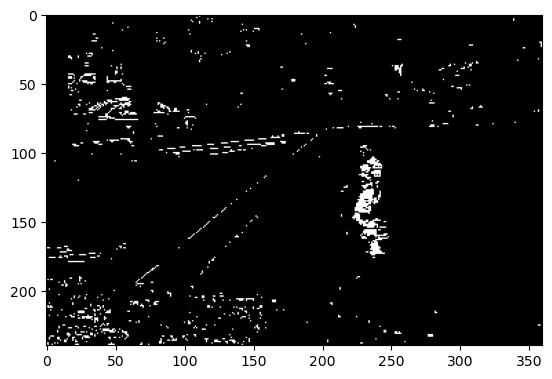

In [22]:
plt.imshow(C2>C2.mean()+2*C2.std(),cmap='gray')